In [1]:
import numpy as np
import pandas as pd
data_dir = "../LlenguaCatalana/dades_david/"


dat1 = pd.read_csv(data_dir + "cat2011.csv", delimiter=";")
dat2 = pd.read_csv(data_dir + "cat2001.csv", delimiter=";")
dat3 = pd.read_csv(data_dir + "est2011.csv", delimiter=";",encoding="latin1")
dat4 = pd.read_csv(data_dir + "est2001.csv", delimiter=";",encoding="latin1")

# show loaded table:
#dat4

In [2]:
import geopandas as gpd
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
data_dir = "../LlenguaCatalana/dades_david/"
comarques = gpd.read_file(data_dir + "comarq.geojson")

In [4]:
print(comarques.columns)

Index(['cartodb_id', 'comarca', 'provincia', 'nom_comar', 'sup_comar',
       'geometry'],
      dtype='object')


In [5]:
print(dat1.columns)
print(comarques.columns)

Index(['Unnamed: 0', 'L'entén', 'El sap parlar', 'El sap llegir',
       'El sap escriure', 'No l'entén', 'Població de 2 anys i més',
       'Unnamed: 7', '% sap parlar', '% int'],
      dtype='object')
Index(['cartodb_id', 'comarca', 'provincia', 'nom_comar', 'sup_comar',
       'geometry'],
      dtype='object')


In [6]:
dat1.rename(columns={'Unnamed: 0': 'nom_comar'}, inplace=True)

In [7]:
print(dat1.columns)
print(comarques.columns)

Index(['nom_comar', 'L'entén', 'El sap parlar', 'El sap llegir',
       'El sap escriure', 'No l'entén', 'Població de 2 anys i més',
       'Unnamed: 7', '% sap parlar', '% int'],
      dtype='object')
Index(['cartodb_id', 'comarca', 'provincia', 'nom_comar', 'sup_comar',
       'geometry'],
      dtype='object')


In [8]:
merged = comarques.merge(dat1, on="nom_comar")

In [9]:
merged

,cartodb_id,comarca,provincia,nom_comar,sup_comar,geometry,L'entén,El sap parlar,El sap llegir,El sap escriure,No l'entén,Població de 2 anys i més,Unnamed: 7,% sap parlar,% int
0,1,30,43,Ribera d'Ebre,827.44,"MULTIPOLYGON (((0.49484 41.19658, 0.49420 41.1...",21852,19060,18807,13229,974,22826,NaN,"83,50127048",83
1,2,22,43,Montsià,734.10,"MULTIPOLYGON (((0.23415 40.77959, 0.23550 40.7...",67547,54647,56357,36302,1773,69320,NaN,"78,83294864",78
2,4,25,25,Pallars Jussà,1343.08,"MULTIPOLYGON (((0.92165 42.48490, 0.92162 42.4...",12680,11028,11052,8246,403,13083,NaN,"84,29259344",84
3,5,26,25,Pallars Sobirà,1377.92,"MULTIPOLYGON (((0.96112 42.63141, 0.96103 42.6...",7056,6255,6283,4699,79,7134,NaN,"87,67872161",87
4,6,27,25,Pla d'Urgell,305.05,"MULTIPOLYGON (((0.86595 41.72429, 0.86519 41.7...",35088,29963,30552,23031,1067,36156,NaN,"82,87144596",82
5,7,6,08,Anoia,866.38,"MULTIPOLYGON (((1.42447 41.73267, 1.42472 41.7...",111147,90395,94676,69379,4316,115462,NaN,"78,28982696",78
6,8,7,08,Bages,1092.42,"MULTIPOLYGON (((1.98584 41.92424, 1.98544 41.9...",173062,146726,151829,114435,5949,179012,NaN,"81,96433759",81
7,9,4,25,Alt Urgell,1447.50,"MULTIPOLYGON (((1.16524 42.21967, 1.16487 42.2...",20245,17547,18286,13328,360,20605,NaN,"85,158942",85
8,10,5,25,Alta Ribagorça,426.87,"MULTIPOLYGON (((0.82620 42.60515, 0.82805 42.6...",3997,3248,3377,2418,..,4032,NaN,"80,55555556",80
9,11,8,43,Baix Camp,696.93,"MULTIPOLYGON (((0.93547 41.32045, 0.93644 41.3...",176508,139197,147335,108874,9623,186131,NaN,"74,78442602",74


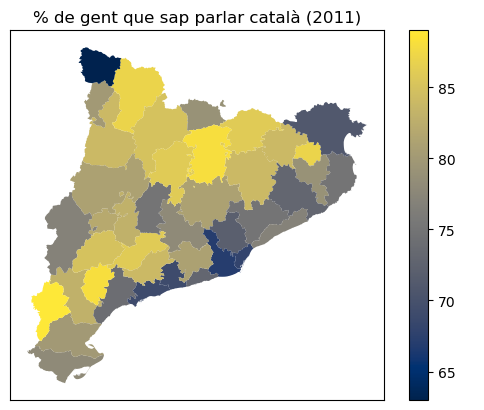

In [10]:
merged.plot(column='% int',
    cmap="cividis",
    legend=True,
    legend_kwds={"label": " ", "orientation": "vertical"},
);
plt.title('% de gent que sap parlar català (2011)')
plt.xticks([])  
plt.yticks([])
plt.savefig(data_dir+'cat2011.png',bbox_inches='tight',dpi=300, transparent=False)
plt.show()

In [11]:
print(dat3.columns)

Index(['Categoria', '(1) Població', 'Població estrangera. Total',
       'Població estrangera. % vert.', 'Població estrangera. % sobre (1)',
       '% int'],
      dtype='object')


In [12]:
dat3.rename(columns={'Categoria': 'nom_comar'}, inplace=True)

In [13]:
print(dat3.columns)
print(comarques.columns)

Index(['nom_comar', '(1) Població', 'Població estrangera. Total',
       'Població estrangera. % vert.', 'Població estrangera. % sobre (1)',
       '% int'],
      dtype='object')
Index(['cartodb_id', 'comarca', 'provincia', 'nom_comar', 'sup_comar',
       'geometry'],
      dtype='object')


In [14]:
merged2 = comarques.merge(dat3, on="nom_comar")
merged2

,cartodb_id,comarca,provincia,nom_comar,sup_comar,geometry,(1) Població,Població estrangera. Total,Població estrangera. % vert.,Població estrangera. % sobre (1),% int
0,1,30,43,Ribera d'Ebre,827.44,"MULTIPOLYGON (((0.49484 41.19658, 0.49420 41.1...",21920,3658,"0,29","16,69",16
1,2,22,43,Montsià,734.10,"MULTIPOLYGON (((0.23415 40.77959, 0.23550 40.7...",68744,12126,"0,95","17,64",17
2,4,25,25,Pallars Jussà,1343.08,"MULTIPOLYGON (((0.92165 42.48490, 0.92162 42.4...",13199,1843,"0,14","13,96",13
3,5,26,25,Pallars Sobirà,1377.92,"MULTIPOLYGON (((0.96112 42.63141, 0.96103 42.6...",7181,684,"0,05","9,53",9
4,6,27,25,Pla d'Urgell,305.05,"MULTIPOLYGON (((0.86595 41.72429, 0.86519 41.7...",37045,7353,"0,58","19,85",19
5,7,6,08,Anoia,866.38,"MULTIPOLYGON (((1.42447 41.73267, 1.42472 41.7...",125065,11885,"0,93","9,5",9
6,8,7,08,Bages,1092.42,"MULTIPOLYGON (((1.98584 41.92424, 1.98544 41.9...",180873,23017,"1,81","12,73",12
7,9,4,25,Alt Urgell,1447.50,"MULTIPOLYGON (((1.16524 42.21967, 1.16487 42.2...",20482,2714,"0,21","13,25",13
8,10,5,25,Alta Ribagorça,426.87,"MULTIPOLYGON (((0.82620 42.60515, 0.82805 42.6...",3958,484,"0,04","12,23",12
9,11,8,43,Baix Camp,696.93,"MULTIPOLYGON (((0.93547 41.32045, 0.93644 41.3...",197525,33583,"2,64",17,17


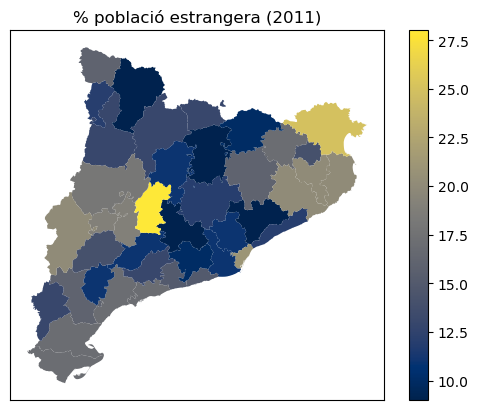

In [15]:
merged2.plot(column='% int',
    cmap="cividis",
    legend=True,
    legend_kwds={"label": " ", "orientation": "vertical"},
);
plt.title('% població estrangera (2011)')
plt.xticks([])  
plt.yticks([])
plt.savefig(data_dir+'est2011.png',bbox_inches='tight',dpi=300, transparent=False)
plt.show()

In [16]:
print(dat2.columns)

Index(['Unnamed: 0', 'L'entén', 'El sap parlar', 'El sap llegir',
       'El sap escriure', 'No l'entén', 'Població de 2 anys i més',
       'Unnamed: 7', '% sap parlar', '% int'],
      dtype='object')


In [17]:
dat2.rename(columns={'Unnamed: 0': 'nom_comar'}, inplace=True)
print(dat2.columns)
print(comarques.columns)

Index(['nom_comar', 'L'entén', 'El sap parlar', 'El sap llegir',
       'El sap escriure', 'No l'entén', 'Població de 2 anys i més',
       'Unnamed: 7', '% sap parlar', '% int'],
      dtype='object')
Index(['cartodb_id', 'comarca', 'provincia', 'nom_comar', 'sup_comar',
       'geometry'],
      dtype='object')


In [18]:
merged3 = comarques.merge(dat2, on="nom_comar")
merged3

,cartodb_id,comarca,provincia,nom_comar,sup_comar,geometry,L'entén,El sap parlar,El sap llegir,El sap escriure,No l'entén,Població de 2 anys i més,Unnamed: 7,% sap parlar,% int
0,1,30,43,Ribera d'Ebre,827.44,"MULTIPOLYGON (((0.49484 41.19658, 0.49420 41.1...",20928,19285,18060,12310,343,21271,NaN,"90,66334446",90
1,2,22,43,Montsià,734.10,"MULTIPOLYGON (((0.23415 40.77959, 0.23550 40.7...",54722,48674,43182,28523,1559,56281,NaN,"86,48389332",86
2,4,25,25,Pallars Jussà,1343.08,"MULTIPOLYGON (((0.92165 42.48490, 0.92162 42.4...",11494,10423,10030,7307,225,11719,NaN,"88,94103592",88
3,5,26,25,Pallars Sobirà,1377.92,"MULTIPOLYGON (((0.96112 42.63141, 0.96103 42.6...",5972,5533,5313,3763,64,6036,NaN,"91,66666667",91
4,6,27,25,Pla d'Urgell,305.05,"MULTIPOLYGON (((0.86595 41.72429, 0.86519 41.7...",28284,25648,24880,18102,736,29020,NaN,"88,38042729",88
5,7,6,08,Anoia,866.38,"MULTIPOLYGON (((1.42447 41.73267, 1.42472 41.7...",87160,71916,70400,50265,3826,90986,NaN,"79,04073154",79
6,8,7,08,Bages,1092.42,"MULTIPOLYGON (((1.98584 41.92424, 1.98544 41.9...",146061,124890,122734,91584,4875,150936,NaN,"82,74367944",82
7,9,4,25,Alt Urgell,1447.50,"MULTIPOLYGON (((1.16524 42.21967, 1.16487 42.2...",18200,16105,15234,10536,418,18618,NaN,"86,50230959",86
8,10,5,25,Alta Ribagorça,426.87,"MULTIPOLYGON (((0.82620 42.60515, 0.82805 42.6...",3352,2839,2772,1793,68,3420,NaN,"83,01169591",83
9,11,8,43,Baix Camp,696.93,"MULTIPOLYGON (((0.93547 41.32045, 0.93644 41.3...",134212,109070,107200,76164,6867,141079,NaN,"77,31129367",77


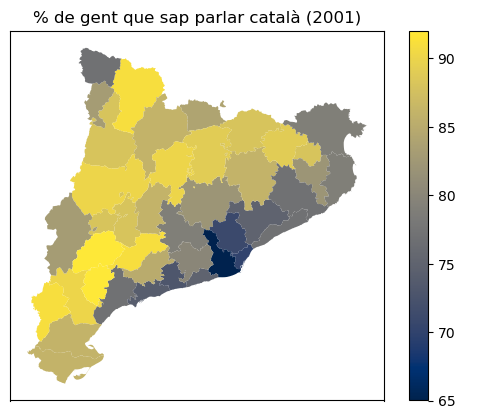

In [19]:
merged3.plot(column='% int',
    cmap="cividis",
    legend=True,
    legend_kwds={"label": " ", "orientation": "vertical"},
);
plt.title('% de gent que sap parlar català (2001)')
plt.xticks([])  
plt.yticks([])
plt.savefig(data_dir+'cat2001.png',bbox_inches='tight',dpi=300, transparent=False)
plt.show()

In [20]:
print(dat4.columns)

Index(['Categoria', '(1) Població', 'Població estrangera. Total',
       'Població estrangera. % vert.', 'Població estrangera. % sobre (1)',
       '% int'],
      dtype='object')


In [21]:
dat4.rename(columns={'Categoria': 'nom_comar'}, inplace=True)
print(dat4.columns)
print(comarques.columns)

Index(['nom_comar', '(1) Població', 'Població estrangera. Total',
       'Població estrangera. % vert.', 'Població estrangera. % sobre (1)',
       '% int'],
      dtype='object')
Index(['cartodb_id', 'comarca', 'provincia', 'nom_comar', 'sup_comar',
       'geometry'],
      dtype='object')


In [22]:
merged4 = comarques.merge(dat4, on="nom_comar")
merged4

,cartodb_id,comarca,provincia,nom_comar,sup_comar,geometry,(1) Població,Població estrangera. Total,Població estrangera. % vert.,Població estrangera. % sobre (1),% int
0,1,30,43,Ribera d'Ebre,827.44,"MULTIPOLYGON (((0.49484 41.19658, 0.49420 41.1...",21951,447,"0,17","2,04",2
1,2,22,43,Montsià,734.10,"MULTIPOLYGON (((0.23415 40.77959, 0.23550 40.7...",57584,3084,"1,2","5,36",5
2,4,25,25,Pallars Jussà,1343.08,"MULTIPOLYGON (((0.92165 42.48490, 0.92162 42.4...",12390,285,"0,11","2,3",2
3,5,26,25,Pallars Sobirà,1377.92,"MULTIPOLYGON (((0.96112 42.63141, 0.96103 42.6...",6140,119,"0,05","1,94",1
4,6,27,25,Pla d'Urgell,305.05,"MULTIPOLYGON (((0.86595 41.72429, 0.86519 41.7...",29872,1080,"0,42","3,62",3
5,7,6,08,Anoia,866.38,"MULTIPOLYGON (((1.42447 41.73267, 1.42472 41.7...",92263,1781,"0,69","1,93",1
6,8,7,08,Bages,1092.42,"MULTIPOLYGON (((1.98584 41.92424, 1.98544 41.9...",148254,3001,"1,17","2,02",2
7,9,4,25,Alt Urgell,1447.50,"MULTIPOLYGON (((1.16524 42.21967, 1.16487 42.2...",19466,749,"0,29","3,85",3
8,10,5,25,Alta Ribagorça,426.87,"MULTIPOLYGON (((0.82620 42.60515, 0.82805 42.6...",3617,64,"0,02","1,77",1
9,11,8,43,Baix Camp,696.93,"MULTIPOLYGON (((0.93547 41.32045, 0.93644 41.3...",146522,6257,"2,43","4,27",4


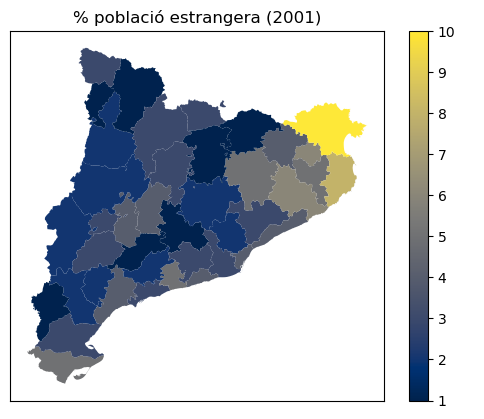

In [23]:
merged4.plot(column='% int',
    cmap="cividis",
    legend=True,
    legend_kwds={"label": " ", "orientation": "vertical"},
);
plt.title('% població estrangera (2001)')
plt.xticks([])  
plt.yticks([])
plt.savefig(data_dir+'est2001.png',bbox_inches='tight',dpi=300, transparent=False)
plt.show()